<a href="https://colab.research.google.com/gist/FinanceData/322e1a6de3da3b70cbb9a8c6650ffa53/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from bs4 import BeautifulSoup

url = 'https://search.naver.com/search.naver?query=삼성전자'
headers = {'user-agent': 'Mozilla/5.0'}
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text)
[s.extract() for s in soup('script')]

print(soup.text)

In [0]:
from collections import Counter

cntr = Counter(soup.text.split())
cntr.most_common(20)

[('삼성전자', 71),
 ('검색', 32),
 ('전', 28),
 ('0', 26),
 ('내', 23),
 ('추이', 20),
 ('NEW', 17),
 ('검색어', 16),
 ('더보기', 15),
 ('네이버', 14),
 ('자동완성', 14),
 ('보기', 13),
 ('블로그', 12),
 ('닫기', 11),
 ('안내', 11),
 ('서비스', 11),
 ('답변', 11),
 ('도움말', 10),
 ('자세히', 10),
 ('끄기', 10)]

## WordCloud

In [0]:
# 필요 패키지 설치
! pip install -q feedparser

# 자바 설치, 버전확인
! apt-get install -q default-jre
! pip install -q newspaper3k
! pip install -q konlpy
! pip install -q wordcloud

    100% |████████████████████████████████| 194kB 6.5MB/s 
Reading package lists...
Building dependency tree...
Reading state information...
default-jre is already the newest version (2:1.10-63ubuntu1~02).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
    100% |████████████████████████████████| 215kB 20.0MB/s 
    100% |████████████████████████████████| 51kB 15.0MB/s 
    100% |████████████████████████████████| 7.4MB 4.0MB/s 
    100% |████████████████████████████████| 19.4MB 1.8MB/s 
    100% |████████████████████████████████| 174kB 7.0MB/s 


In [0]:
# 폰트 설치
! apt-get install fonts-nanum fonts-nanum-coding fonts-nanum-extra

In [0]:
import feedparser
import newspaper
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def draw_wordcloud_from_rss(rss_link):
    #  feedparser, newspaper: RSS를 통해 뉴스의 본문을 수집
    feeds = feedparser.parse(rss_link)
    links = [entry['link'] for entry in feeds['entries']]

    news_text =''
    for link in links:
        article = newspaper.Article(link, language='ko')
        article.download()
        article.parse()
        print(article.title)
        news_text += article.text

    # konlpy, Okt: 형태소 분석을 통해 본문에서 명사추출, 1글자는 단어는 삭제
    engine = Okt() 
    nouns = engine.nouns(news_text)
    nouns = [n for n in nouns if len(n) > 1]

    # Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 40개
    count = Counter(nouns)
    tags = count.most_common(40)

    # WordCloud, matplotlib: 단어 구름 그리기
    font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
    wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.savefig('wordcloud.png')

HRW, 日정부에 “성전환자 강제 불임 시술 철폐하라”
英의 브렉시트 연기 요청에…메르켈 “지켜보자”
디즈니, 80조원에 21세기 폭스 인수 마무리
“美, ‘北 위성발사 가능성 있다’ 대책 논의 중”
[청계천 옆 사진관]♡ Hallo Hanoi ♡〈2〉
中 여대생들 “난자 팔아요”…최고 840만원
중국 어선, 서해 북부 단둥 부근서 침몰사고…6명 실종
‘소녀상 말뚝테러’ 스즈키 6년째 불출석…日“범죄인인도 검토중”
“美에 나라 팔아먹었다”…브라질 대통령 비난 여론 확산
지하철 두 자리 차지 민폐 10대 ‘참교육’ 승객에 박수 갈채
타임 “트럼프, 최근 비건의 막후 대북채널 복구 노력 막아”
프랑스서 ‘북한 가이드북’ 발간돼…“들고 가진 마세요”
日산케이 “韓 초등교과서 강제징용 피해자 사진은 허위”
中언론 “불법로비설 중국계 女사업가, 美 마녀사냥에 희생”
日 언론 “신동주 롯데 전 부회장, 신뢰 잃었다…직원들 신동빈 회장 지지”
보잉 의혹 밝혀내나…美교통부, FAA 유착 가능성 감사 착수
덴마크 女의원 “국회에 아기 데려오지 말란 경고 받아”
“北, 하노이 회담 결렬 뒤 전국서 ‘자아비판’ 집회”
트럼프 장남 “브렉시트는 기득권층 최후의 발악”
美법원 배심원단 “몬산토 제초제, 암발병 주요 원인” 만장일치
“美, 이라크에 對이란 제재 면제 90일 연장”
메르켈 “화웨이 배제 불가…유럽만의 해법 필요”
매티스 전 美국방장관, 스탠퍼드대 후버연구소 복귀
사람잡은 과일주스 정맥주사…中여성 혼수상태
체중 7kg ‘초우량 여아’ 출산…산모 “낳을 때 트럭에 치이는 느낌”
日 무인 탐사선 하야부사2, 소행성 류구에 물 존재 확인
바이든 지지율 35% 민주당 대선후보 선두…샌더스 27%
CNN “美정부, 北 위성발사시 대응방안 은밀 논의 중”
국제유가, 미중 무역협상 불확실성에 혼조세
美 의회, 페이스북 등에 뉴질랜드 테러 영상 확산 해명 요구
중국 베이징 등 수도권 대기오염 20일 오전 ‘최악’
美전문가들 “北, 내부용 체면살리기로 위성발사할 수도”
메이 英총리 브렉시

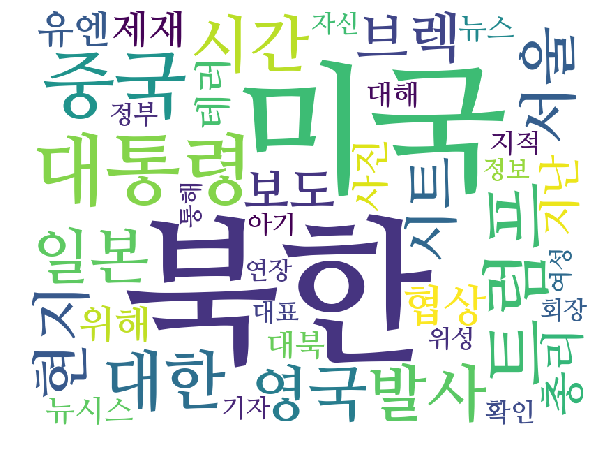

In [0]:
rss_link = 'http://rss.donga.com/international.xml'
draw_wordcloud_from_rss(rss_link)

In [0]:
from google.colab import files

files.download('wordcloud.png')

“北 핵포기 안해”했던 美정보수장, 文대통령 만나 무슨 얘기?
與野 의원 50명, ‘5·18 유공자’ 서훈 촉구 결의안 발의
‘외교안보 전문가’ 백승주 “희망과 현실 구분 못한 ‘文정부 보증외교’ 대실패”
선거제 개편안 패스트트랙 분수령…‘나홀로 투쟁’ 한국당, 반전? 고립?
홍문종 “朴, 영어의 몸 될 필요 없었다 …자유의 몸 돼야”
文대통령, 댄 코츠 美 정보기관 수장 접견…“양국 현안 의견 교환”
文대통령 “민간부분 일자리 부진…혁신성장 차질없이 추진하라”
靑 “윤 총경-유인석 만남, 경찰 수사서 명명백백 밝혀질 것”
文대통령, 코츠 美국가정보국장 접견…하노이 후속 논의
靑 “文대통령 가족 누구도 특권·특혜와 멀다…곽상도, 증거로 말하길”
[프로필]이미선 헌법재판관 후보…임명땐 49세 최연소
[전문]윤소하 정의당 원내대표 비교섭단체 대표 연설문
황교안 “흠집내는 방법도 가지각색…가증스럽고 졸렬”
북한 ‘톱3’ 대사 동시에 평양행…대외 메시지 준비하나
“우리가 왜 나가”…분당설까지 번진 바른미래 패스트트랙 갈등
“정의당 교섭단체 돼 선거법 반대하나” 윤소하 발언에 한국당 퇴장
황운하 “경찰수사에 대한 정치공세 결연한 의지로 명예 지키겠다”
[프로필] 문형배 헌법재판관 후보…우리法 출신 부산 법관
김관영 “당내 여전히 선거법 문제제기 의원들 있어…결론 못내”
“美, ‘北 위성발사 가능성 있다’ 대책 논의 중”
[속보]文대통령, 헌법재판관 후보자 2명 지명…문형배·이미선 부장판사
文대통령, 신임 헌법재판관 문형배·이미선 지명…文, ‘우리法’ 회장 출신
‘버선발 이야기’ 출간 백기완 “버선발=맨발, 니나(민중)의 삶·꿈·희망 기록”
“‘MB 한풀이’로 축복 뺐으려 해…정권 바뀌면 다 감옥 갈 것”
김성태 “딸, KT 인사팀 직원에게 직접 지원서 전달해”
靑 “남북미 정상회담 개최 제안? 사실무근…그럴 계획도 없다”
선거제 개편안 ‘캐스팅보트’ 바른미래 280분 의총…갈등만 확인
한국당 “김기현 전 울산시장 수사는 공작…특검 불사”
패스트트랙 법안 논의 ‘산 넘어

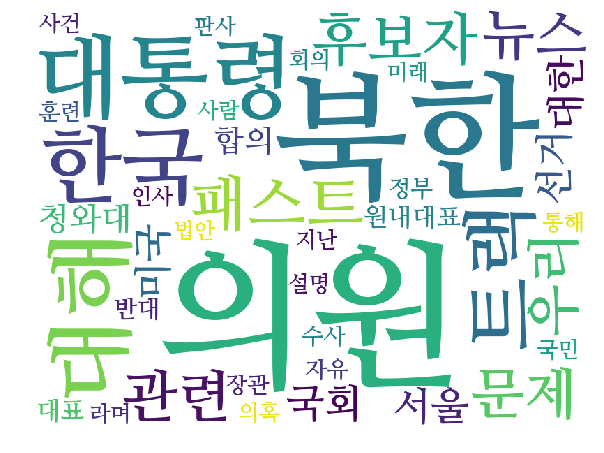

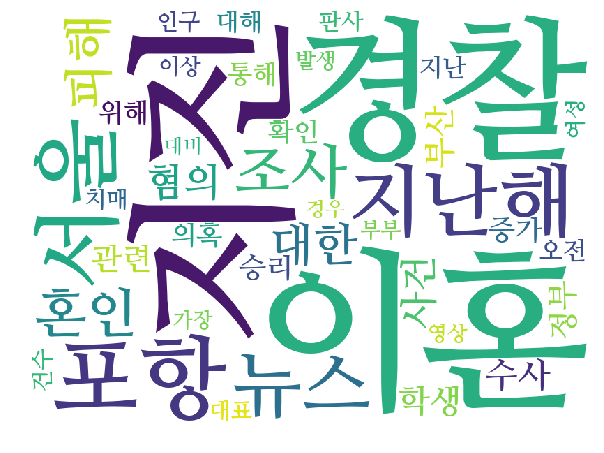

In [0]:
rss_links = [
    'http://rss.donga.com/politics.xml',
    'http://rss.donga.com/national.xml',
]

for rss_link in rss_links:
    draw_wordcloud_from_rss(rss_link)

## 검색어 클라우드

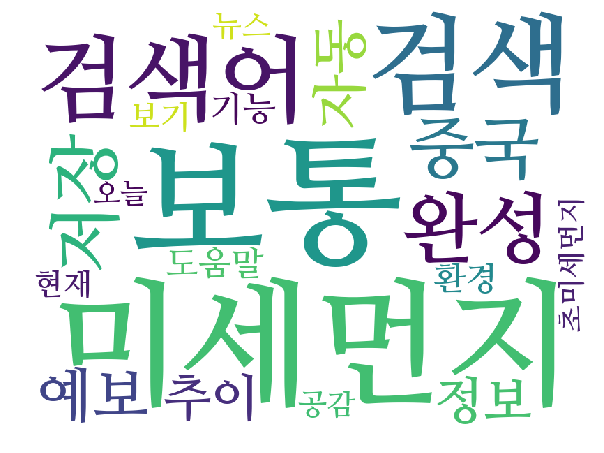

In [0]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

url = 'https://search.naver.com/search.naver?query=미세먼지'
r = requests.get(url)
soup = BeautifulSoup(r.text)
for s in soup('script'):
    s.extract() 

# konlpy, Okt: 형태소 분석을 통해 본문에서 명사추출, 1글자는 단어는 삭제
engine = Okt() 
nouns = engine.nouns(soup.text)
nouns = [n for n in nouns if len(n) > 1]

cntr = Counter(nouns)
tags = cntr.most_common(20)

# WordCloud, matplotlib: 단어 구름 그리기
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)    

### 2019 FinanceData.KR